# Apply classification model to detect the default credit card  of the customers 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing library
import pandas as pd
import numpy as np


#Reading Dataset

In [3]:
Mydata = pd.read_excel('/content/drive/MyDrive/Meead/project/default.xlsx')

In [4]:
Mydata.head(3)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [5]:
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
%matplotlib inline 
import seaborn as sns
sns.set(color_codes = True)

# As info() method show that our data include 30000 entries and  25 columns

In [6]:
Mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      30000 non-null  int64
 1   X1      30000 non-null  int64
 2   X2      30000 non-null  int64
 3   X3      30000 non-null  int64
 4   X4      30000 non-null  int64
 5   X5      30000 non-null  int64
 6   X6      30000 non-null  int64
 7   X7      30000 non-null  int64
 8   X8      30000 non-null  int64
 9   X9      30000 non-null  int64
 10  X10     30000 non-null  int64
 11  X11     30000 non-null  int64
 12  X12     30000 non-null  int64
 13  X13     30000 non-null  int64
 14  X14     30000 non-null  int64
 15  X15     30000 non-null  int64
 16  X16     30000 non-null  int64
 17  X17     30000 non-null  int64
 18  X18     30000 non-null  int64
 19  X19     30000 non-null  int64
 20  X20     30000 non-null  int64
 21  X21     30000 non-null  int64
 22  X22     30000 non-null  int64
 23  X23     300

#test if the dataset have missing value


In [7]:
Mydata.isnull().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

#Analysi Data

*As count plot shows that the 0 value more than 1 , which mean that the person who doesn't have default payment next month more

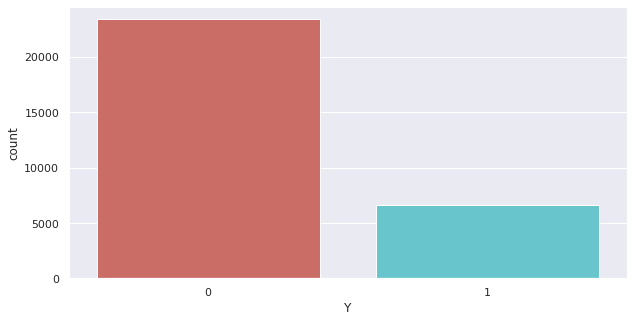

In [8]:
#default payment next month
plt.figure(figsize=(10,5))
sns.countplot(x= Mydata['Y'], data= Mydata, palette= 'hls')
plt.show()

* As count plot shows that the female more than male

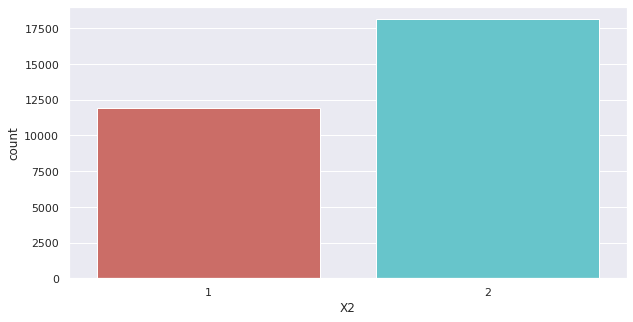

In [9]:
#gender
plt.figure(figsize=(10,5))
sns.countplot(x= Mydata['X2'], data= Mydata, palette= 'hls')
plt.show()

* As count plot shows that the university more than others

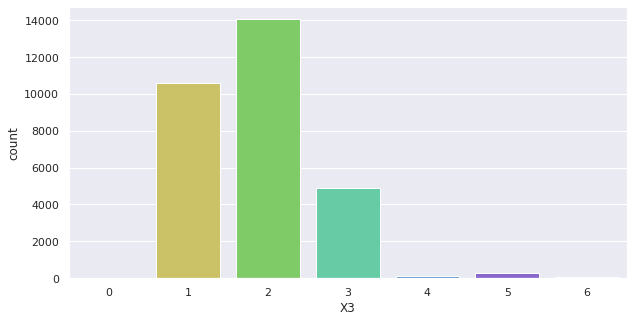

In [10]:
#EDUCATION
plt.figure(figsize=(10,5))
sns.countplot(x= Mydata['X3'], data= Mydata, palette= 'hls')
plt.show()

*  As count plot shows that the single state more than others

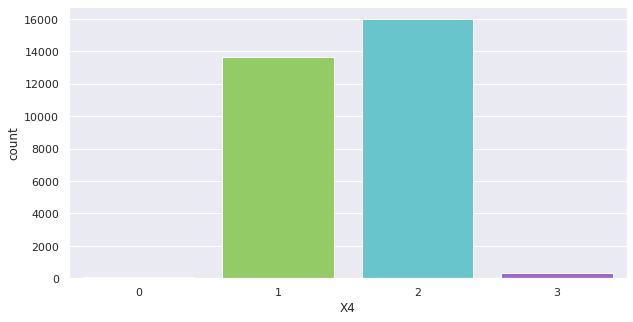

In [11]:
#MARRIAGE
plt.figure(figsize=(10,5))
sns.countplot(x= Mydata['X4'], data= Mydata, palette= 'hls')
plt.show()

* Line plot shows the relationship between the repayment status in August, 2005 and Amount of the given credit (NT dollar)

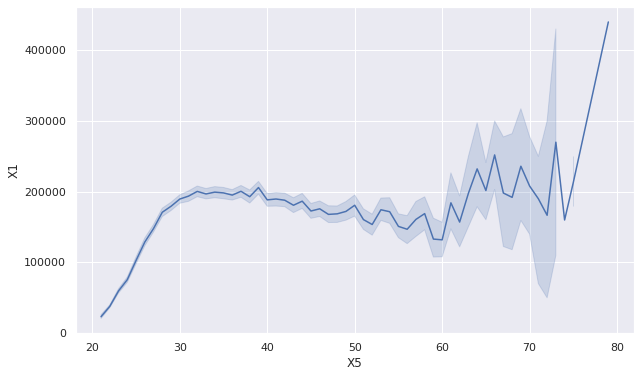

In [12]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

sns.lineplot(x=Mydata['X5'], y=Mydata['X1'])

In [13]:
Mydata.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

* choose columns to build machine learning model 

In [14]:
col = ['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23']

# Split Data
* X: all independent variables
* y: dependent variable to predict it

In [15]:
X=Mydata[col]
y=Mydata['Y']

In [16]:
X

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [17]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Y, Length: 30000, dtype: int64

* split : train , test

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
X_train

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
28465,28466,240000,2,1,1,40,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0
27622,27623,50000,2,1,2,23,-1,-1,-1,-1,-1,-1,3430,2478,2299,4800,9810,660,2548,2321,4800,9810,660,2980
28376,28377,50000,2,2,1,36,2,2,2,2,0,0,46203,45159,49125,47956,43578,35126,0,4700,0,2004,3500,0
10917,10918,200000,2,3,1,54,6,5,4,3,2,2,110185,107665,104686,102549,101400,0,0,0,0,0,0,0
27234,27235,240000,1,1,1,35,-1,-1,-1,0,-1,-1,2024,2007,21790,17102,13367,22659,2017,21817,1120,13434,22772,22820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,29803,50000,1,2,2,32,0,0,0,0,0,0,52475,53600,55739,55957,29238,6119,2000,3000,1591,72,1134,73421
5390,5391,200000,1,1,2,37,2,2,2,2,2,2,157131,166590,168386,164182,169029,172084,13500,6000,0,7500,6000,4000
860,861,50000,1,1,2,26,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0
15795,15796,70000,2,2,2,25,0,0,0,0,2,2,73939,70488,51152,35122,28633,28039,3000,2000,4500,1200,0,1200


In [20]:
y_test

2308     0
22404    0
23397    0
25058    0
2664     1
        ..
3941     1
17854    0
95       0
6279     0
26428    0
Name: Y, Length: 9000, dtype: int64

#Next Step: Building model and evaluate

The model is classification algorithms including Support vector machine and Decision tree.